In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
for col in train.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [7]:
rows = len(train.columns)
cols = len(train)
print("rows="+str(rows)+"  " +"columns="+str(cols))

rows=12  columns=891


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(train.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [11]:
dict={}
dict["Survived"]=train.Survived.unique()
dict["Pclass"]=train.Pclass.unique()
dict["Age"]=train.Age.unique()
dict["SibSp"]=train.SibSp.unique()
dict["Parch"]=train.Parch.unique()
dict["Embarked"]=train.Embarked.unique()
dict["Sex"]=train.Sex.unique()
print(dict)

{'Survived': array([0, 1], dtype=int64), 'Pclass': array([3, 1, 2], dtype=int64), 'Age': array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]), 'SibSp': array([1, 0, 3, 4, 2, 5, 8], dtype=int64), 'Parch': array([0, 1, 2, 5, 3, 4, 6], dtype=int64), 'Embarked': array(['S', 'C', 'Q', nan], dtype=object), 'Sex': array(['male', 'female'], dtype=object)}


In [12]:
print(train.Name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [13]:
import re

In [14]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
survivaldict={}
totaldict={}

for i in zip(train["Title"],train["Survived"]):
    if i[0] in totaldict.keys():
        totaldict[i[0]]+=1
        survivaldict[i[0]]+=i[1]
    else:
        totaldict[i[0]]=1
        survivaldict[i[0]]=i[1]
        
print(survivaldict)  
print(totaldict)

{'Mr': 81, 'Mrs': 99, 'Miss': 127, 'Master': 23, 'Don': 0, 'Rev': 0, 'Dr': 3, 'Mme': 1, 'Ms': 1, 'Major': 1, 'Lady': 1, 'Sir': 1, 'Mlle': 2, 'Col': 1, 'Capt': 0, 'Countess': 1, 'Jonkheer': 0}
{'Mr': 517, 'Mrs': 125, 'Miss': 182, 'Master': 40, 'Don': 1, 'Rev': 6, 'Dr': 7, 'Mme': 1, 'Ms': 1, 'Major': 2, 'Lady': 1, 'Sir': 1, 'Mlle': 2, 'Col': 2, 'Capt': 1, 'Countess': 1, 'Jonkheer': 1}


In [18]:
survivalratedict={}

for i in totaldict.keys():
    survivalratedict[i]=survivaldict[i]/totaldict[i]
    
    
print(survivalratedict)

{'Mr': 0.15667311411992263, 'Mrs': 0.792, 'Miss': 0.6978021978021978, 'Master': 0.575, 'Don': 0.0, 'Rev': 0.0, 'Dr': 0.42857142857142855, 'Mme': 1.0, 'Ms': 1.0, 'Major': 0.5, 'Lady': 1.0, 'Sir': 1.0, 'Mlle': 1.0, 'Col': 0.5, 'Capt': 0.0, 'Countess': 1.0, 'Jonkheer': 0.0}


In [19]:
SR_df=pd.DataFrame()
SR_df["Title"]=list(survivalratedict.keys())
SR_df["SurvivalRate"]=list(survivalratedict.values())

In [20]:
SR_df

,Title,SurvivalRate
0,Mr,0.156673
1,Mrs,0.792000
2,Miss,0.697802
3,Master,0.575000
4,Don,0.000000
5,Rev,0.000000
6,Dr,0.428571
7,Mme,1.000000
8,Ms,1.000000
9,Major,0.500000


In [21]:
import matplotlib.pyplot as plt

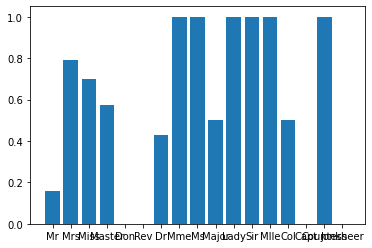

In [22]:

plt.bar(SR_df.Title, SR_df.SurvivalRate)
plt.show()

In [23]:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

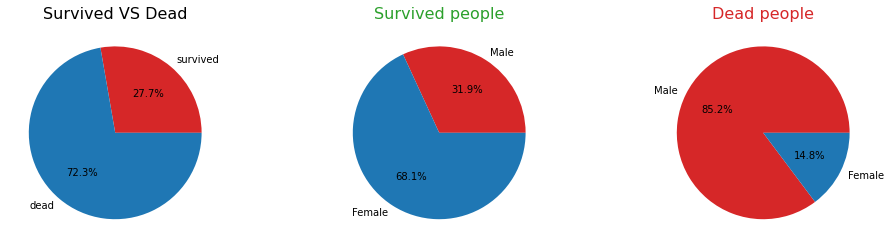

In [24]:
plt.subplots_adjust(left=1,bottom=1,right=3,top=3,wspace=0.5,hspace=None)
plt.subplot(1,3,1)
plt.pie(x=[len(train[train.Survived==1]),len(train.Survived==0)]
        ,labels=['survived','dead'],colors=['tab:red','tab:blue'],autopct='%.1f%%')
plt.title('Survived VS Dead' ,fontdict={'size':16})

plt.subplot(1,3,2)
plt.pie(x=[len(train[(train.Survived==1)&(train.Sex=="male")]),len(train[(train.Survived==1)&(train.Sex=="female")])]
        ,labels=['Male','Female'],colors=['tab:red','tab:blue'],autopct='%.1f%%')
plt.title('Survived people' ,fontdict={'color':'tab:green','size':16})
           
plt.subplot(1,3,3)
plt.pie(x=[len(train[(train.Survived==0)&(train.Sex=="male")]),len(train[(train.Survived==0)&(train.Sex=="female")])]
        ,labels=['Male','Female'],colors=['tab:red','tab:blue'],autopct='%.1f%%')
plt.title('Dead people' ,fontdict={'color':'tab:red','size':16})
           
           
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

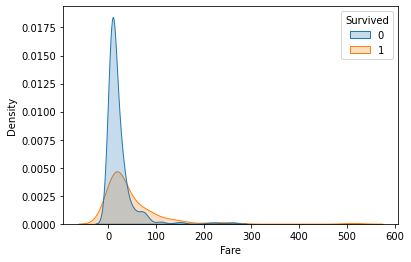

In [25]:
import seaborn as sns 
sns.kdeplot(data=train ,x='Fare',hue='Survived',fill=True)

In [26]:
del train["PassengerId"]
print(train)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      mal

In [27]:
del train["Ticket"]
print(train)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin Embarked Title  
0      male  22.0      

In [28]:
import pandas as pd

x=round(100*(train.isnull().sum()/len(train.index)),2)
print(x)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
Title        0.00
dtype: float64


In [29]:
del train["Cabin"]
print(train)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked Title  
0      male  22.0      1     

In [30]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

In [31]:
train['Age'].fillna(int(train['Age'].mean()), inplace=True)

In [32]:
train['Family'] = train.Parch + train.SibSp

In [33]:
del train["Parch"]
del train["SibSp"]

In [42]:
categorical_columns = ['Pclass', 'Sex' , 'Title' , 'Embarked']

for column in categorical_columns:
    tempdf = pd.get_dummies(train[column], prefix=column)

    train = pd.merge(
        left=train,
        right=tempdf,
        left_index=True,
        right_index=True,
    )

    df = train.drop(columns=column)

print(df)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age     Fare Title  Family  Pclass_1  Pclass_2  ...  Title_Mlle  \
0     

In [43]:
normal = train.copy()
normal.drop('Embarked',axis=1,inplace=True)
normal.drop('Pclass',axis=1,inplace=True)
normal.drop('Survived',axis=1,inplace=True)
normal.drop('Sex',axis=1,inplace=True)
normal.drop('Title',axis=1,inplace=True)
# normal.drop('SR',axis=1,inplace=True)

df_min_max_scaled = normal.copy()
 

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
 
# view normalized data
print(df_min_max_scaled)


TypeError: unsupported operand type(s) for -: 'str' and 'str'